In [53]:
# importing models 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import io
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


In [62]:
df = pd.read_csv(io.BytesIO(uploaded['covid.csv']))

In [ ]:
df.loc[df["y"] == 1].count()

Date             2017
ID               2017
y                2017
Age              2017
Sex              2017
Hematocrit       2017
Hemoglobin       2017
RedBloodCells    2017
Leukocytes       2017
Platelets        2017
MPV              2017
MCV              2017
MCHC             2017
MCH              2017
RDW              2017
Monocytes        2017
Monocytes%       2017
Lymphocytes      2017
Lymphocytes%     2017
Eosinophils      2017
Eosinophils%     2017
Basophils        2017
Basophils%       2017
Neutrophils      2017
Neutrophils%     2017
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14681 entries, 0 to 14680
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           14681 non-null  object 
 1   ID             14681 non-null  object 
 2   y              14681 non-null  int64  
 3   Age            14681 non-null  float64
 4   Sex            14681 non-null  object 
 5   Hematocrit     14681 non-null  float64
 6   Hemoglobin     14681 non-null  float64
 7   RedBloodCells  14681 non-null  float64
 8   Leukocytes     14681 non-null  float64
 9   Platelets      14681 non-null  int64  
 10  MPV            14681 non-null  float64
 11  MCV            14681 non-null  float64
 12  MCHC           14681 non-null  float64
 13  MCH            14681 non-null  float64
 14  RDW            14681 non-null  float64
 15  Monocytes      14681 non-null  int64  
 16  Monocytes%     14681 non-null  float64
 17  Lymphocytes    14681 non-null  int64  
 18  Lympho

In [ ]:
# Checking for missing values
df.isnull().sum()

Date             0
ID               0
y                0
Age              0
Sex              0
Hematocrit       0
Hemoglobin       0
RedBloodCells    0
Leukocytes       0
Platelets        0
MPV              0
MCV              0
MCHC             0
MCH              0
RDW              0
Monocytes        0
Monocytes%       0
Lymphocytes      0
Lymphocytes%     0
Eosinophils      0
Eosinophils%     0
Basophils        0
Basophils%       0
Neutrophils      0
Neutrophils%     0
dtype: int64

In [ ]:
 

df.isnull().sum()

df.corr()

,y,Age,Hematocrit,Hemoglobin,RedBloodCells,Leukocytes,Platelets,MPV,MCV,MCHC,...,Monocytes,Monocytes%,Lymphocytes,Lymphocytes%,Eosinophils,Eosinophils%,Basophils,Basophils%,Neutrophils,Neutrophils%
y,1.000000,0.128753,0.013017,0.020018,0.015154,-0.189484,-0.129468,-0.003978,-0.008086,0.031380,...,-0.031170,0.224350,-0.190240,-0.094484,-0.197497,-0.180437,-0.271745,-0.190538,-0.109676,0.070666
Age,0.128753,1.000000,-0.009018,-0.054699,-0.146082,-0.049904,-0.153547,0.059247,0.317125,-0.192036,...,0.014724,0.087299,-0.202922,-0.232863,-0.057400,-0.039369,0.017831,0.041597,0.037921,0.191242
Hematocrit,0.013017,-0.009018,1.000000,0.969179,0.889498,-0.020421,-0.089032,0.015375,-0.012411,0.155252,...,0.035138,0.058590,0.049445,0.075737,0.055699,0.055742,0.130399,0.108845,-0.053412,-0.093187
Hemoglobin,0.020018,-0.054699,0.969179,1.000000,0.859342,-0.019387,-0.122149,-0.014744,-0.009040,0.391232,...,0.034967,0.060314,0.043478,0.070193,0.046458,0.046036,0.105700,0.087325,-0.048313,-0.085815
RedBloodCells,0.015154,-0.146082,0.889498,0.859342,1.000000,0.008780,-0.020830,-0.013974,-0.459318,0.122487,...,0.042455,0.033023,0.084485,0.095860,0.063475,0.052759,0.118405,0.080512,-0.037059,-0.103487
Leukocytes,-0.189484,-0.049904,-0.020421,-0.019387,0.008780,1.000000,0.262542,-0.075164,-0.057765,-0.001501,...,0.599705,-0.283676,0.385119,-0.388278,0.110517,-0.133177,0.197784,-0.269722,0.892058,0.438761
Platelets,-0.129468,-0.153547,-0.089032,-0.122149,-0.020830,0.262542,1.000000,-0.306562,-0.133976,-0.160211,...,0.157607,-0.124203,0.245474,0.095442,0.175748,0.093232,0.300720,0.140618,0.158512,-0.075871
MPV,-0.003978,0.059247,0.015375,-0.014744,-0.013974,-0.075164,-0.306562,1.000000,0.063821,-0.114512,...,-0.073574,-0.016905,-0.008803,0.059475,-0.008355,0.018938,0.035808,0.076917,-0.075802,-0.056557
MCV,-0.008086,0.317125,-0.012411,-0.009040,-0.459318,-0.057765,-0.133976,0.063821,1.000000,0.020734,...,-0.022875,0.044927,-0.093946,-0.069903,-0.029853,-0.006709,-0.003269,0.037608,-0.019523,0.050911
MCHC,0.031380,-0.192036,0.155252,0.391232,0.122487,-0.001501,-0.160211,-0.114512,0.020734,1.000000,...,0.006666,0.021353,-0.007177,0.003491,-0.024479,-0.026978,-0.064085,-0.057357,0.004583,0.000491


([<matplotlib.patches.Wedge at 0x7fe1349dc2d0>,
 [Text(-0.23907613208412362, 1.6325877014934589, 'F'),
  Text(0.23907613208412343, -1.6325877014934589, 'M')],
 [Text(-0.1304051629549765, 0.8905023826327956, '54.6%'),
  Text(0.1304051629549764, -0.8905023826327956, '45.4%')])

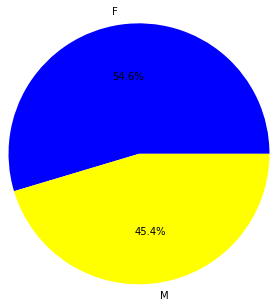

In [ ]:
# Spliting the dataset into train set and test set
plt.pie(df['Sex'].value_counts(), labels=['F','M'], colors=['blue','yellow'], autopct='%1.1f%%', radius=1.5)


([<matplotlib.patches.Wedge at 0x7f3dc3ee9950>,
 [Text(-1.4986781893834211, 0.6902634893042155, 'Positive'),
  Text(1.4986781893834213, -0.690263489304215, 'Negative')],
 [Text(-0.817460830572775, 0.3765073578022993, '86.3%'),
  Text(0.8174608305727751, -0.37650735780229905, '13.7%')])

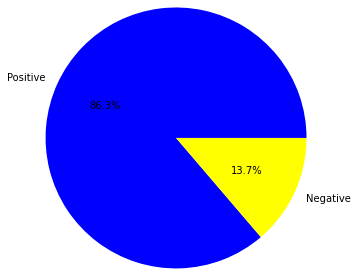

In [ ]:
plt.pie(df['y'].value_counts(), labels=['Positive','Negative'], colors=['blue','yellow'], autopct='%1.1f%%', radius=1.5)

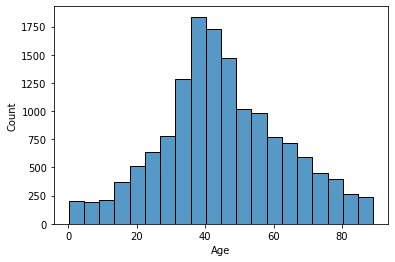

In [ ]:
# Making prediction using Logistic Regression 

sns.histplot(df['Age'], bins= 20)

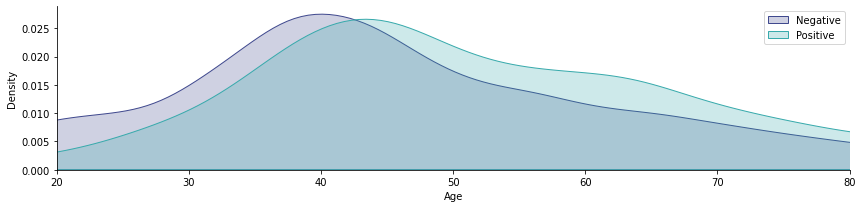

In [ ]:
fig = sns.FacetGrid(df, hue="y",aspect=4, palette='mako')
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(20,80))
plt.legend(labels=['Negative' , 'Positive'])


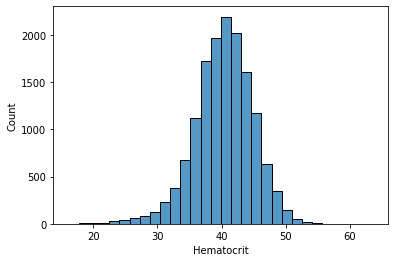

In [ ]:
# Accuracy Score 

sns.histplot(df['Hematocrit'], bins= 30)

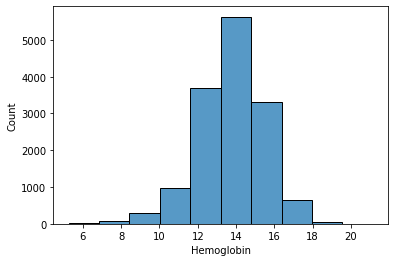

In [ ]:
sns.histplot(df['Hemoglobin'], bins= 10)


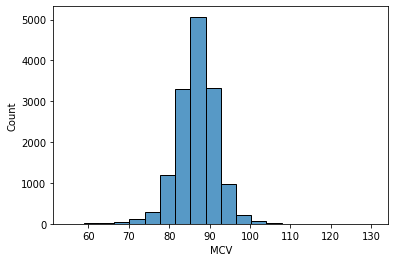

In [ ]:
sns.histplot(df['MCV'], bins= 20)


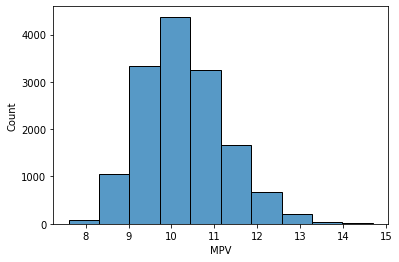

In [ ]:
sns.histplot(df['MPV'], bins= 10)

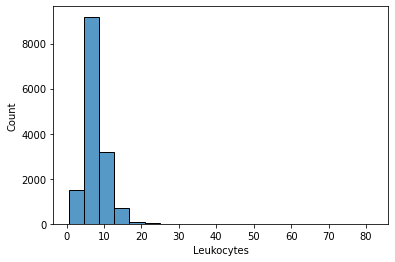

In [ ]:
sns.histplot(df['Leukocytes'], bins= 20)

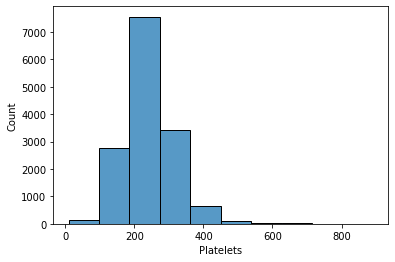

In [ ]:
sns.histplot(df['Platelets'], bins= 10)

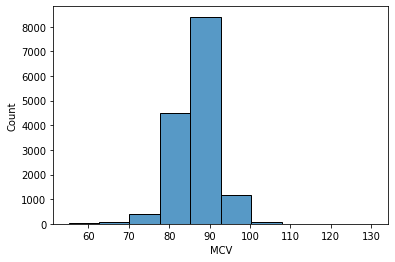

In [ ]:
sns.histplot(df['MCV'], bins= 10)

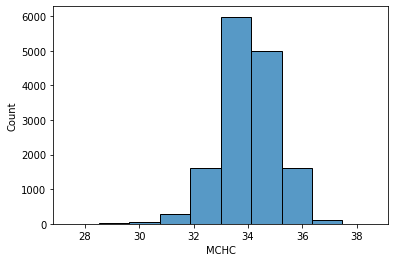

In [ ]:
sns.histplot(df['MCHC'], bins= 10)

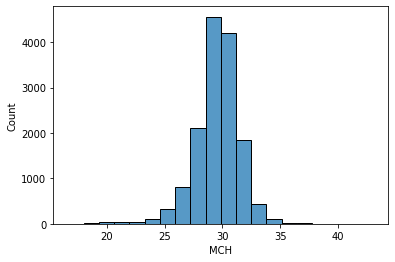

In [ ]:
sns.histplot(df['MCH'], bins= 20)

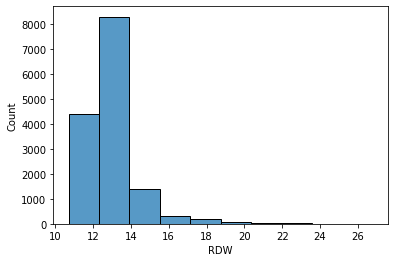

In [ ]:
sns.histplot(df['RDW'], bins= 10)

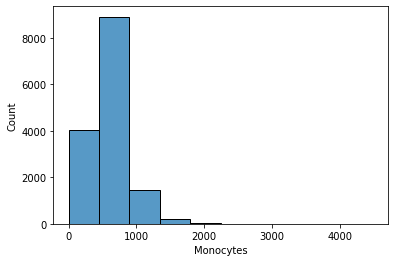

In [ ]:
sns.histplot(df['Monocytes'], bins= 10)

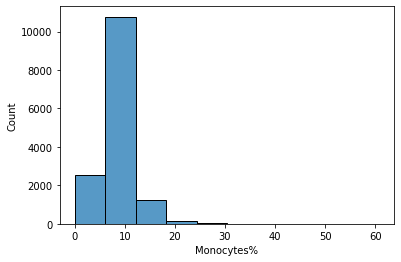

In [ ]:
sns.histplot(df['Monocytes%'], bins= 10)

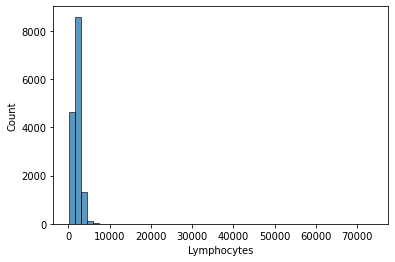

In [ ]:
sns.histplot(df['Lymphocytes'], bins= 50)

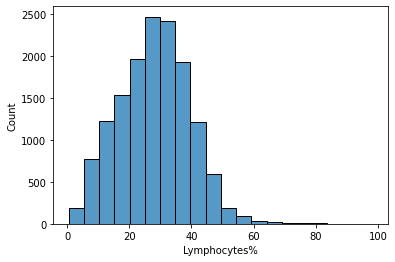

In [ ]:
sns.histplot(df['Lymphocytes%'], bins= 20)

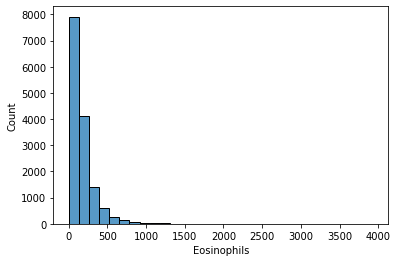

In [ ]:
sns.histplot(df['Eosinophils'], bins= 30)

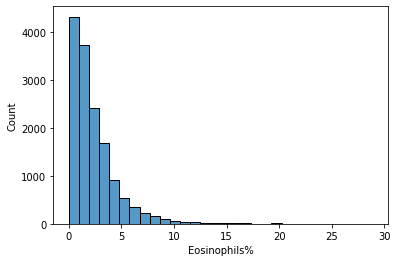

In [ ]:
sns.histplot(df['Eosinophils%'], bins= 30)

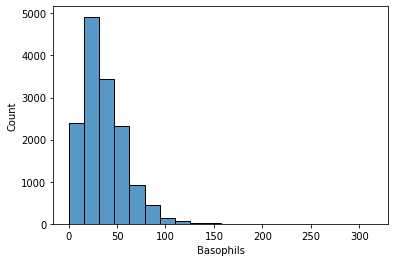

In [ ]:
sns.histplot(df['Basophils'], bins= 20)

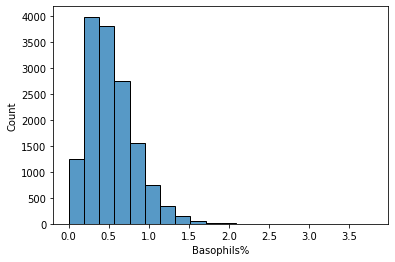

In [ ]:
sns.histplot(df['Basophils%'], bins= 20)

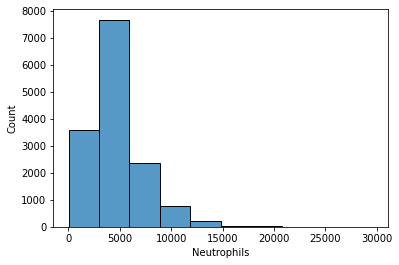

In [ ]:
sns.histplot(df['Neutrophils'], bins= 10)

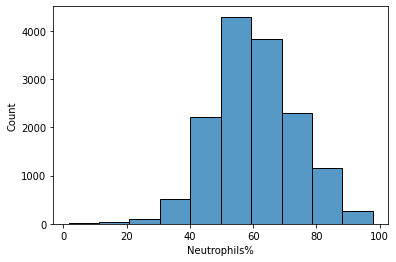

In [50]:
sns.histplot(df['Neutrophils%'], bins= 10)

In [63]:
# stroing the targes in result column 
results = df['y']
df['result'] = results

del df['y']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14681 entries, 0 to 14680
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           14681 non-null  object 
 1   ID             14681 non-null  object 
 2   Age            14681 non-null  float64
 3   Sex            14681 non-null  object 
 4   Hematocrit     14681 non-null  float64
 5   Hemoglobin     14681 non-null  float64
 6   RedBloodCells  14681 non-null  float64
 7   Leukocytes     14681 non-null  float64
 8   Platelets      14681 non-null  int64  
 9   MPV            14681 non-null  float64
 10  MCV            14681 non-null  float64
 11  MCHC           14681 non-null  float64
 12  MCH            14681 non-null  float64
 13  RDW            14681 non-null  float64
 14  Monocytes      14681 non-null  int64  
 15  Monocytes%     14681 non-null  float64
 16  Lymphocytes    14681 non-null  int64  
 17  Lymphocytes%   14681 non-null  float64
 18  Eosino

In [65]:
#dropping some features from the dataset and assigning it to a new variable
new_df = df.drop(['ID', 'Sex','Date'], axis = 1)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14681 entries, 0 to 14680
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            14681 non-null  float64
 1   Hematocrit     14681 non-null  float64
 2   Hemoglobin     14681 non-null  float64
 3   RedBloodCells  14681 non-null  float64
 4   Leukocytes     14681 non-null  float64
 5   Platelets      14681 non-null  int64  
 6   MPV            14681 non-null  float64
 7   MCV            14681 non-null  float64
 8   MCHC           14681 non-null  float64
 9   MCH            14681 non-null  float64
 10  RDW            14681 non-null  float64
 11  Monocytes      14681 non-null  int64  
 12  Monocytes%     14681 non-null  float64
 13  Lymphocytes    14681 non-null  int64  
 14  Lymphocytes%   14681 non-null  float64
 15  Eosinophils    14681 non-null  int64  
 16  Eosinophils%   14681 non-null  float64
 17  Basophils      14681 non-null  int64  
 18  Basoph

In [68]:
print(new_df.columns[:-1])

Index(['Age', 'Hematocrit', 'Hemoglobin', 'RedBloodCells', 'Leukocytes',
       'Platelets', 'MPV', 'MCV', 'MCHC', 'MCH', 'RDW', 'Monocytes',
       'Monocytes%', 'Lymphocytes', 'Lymphocytes%', 'Eosinophils',
       'Eosinophils%', 'Basophils', 'Basophils%', 'Neutrophils',
       'Neutrophils%'],
      dtype='object')


In [71]:
# Spliting the dataset into train set and test set
features= new_df.columns[:-1]


X = df[features]
y = df['result']


X_train, X_test, y_train, y_test = train_test_split(X,y)

In [72]:
# Making prediction using Logistic Regression 

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [73]:
predictions = lr.predict(X_test)

accuracy=accuracy_score(y_test,predictions)
accuracy

0.8804140561154998

In [74]:
#making predictions and checking for accuracy of DecisionTreeAlgorithm
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
predictions = dtc.predict(X_test)


accuracy=accuracy_score(y_test,predictions)
accuracy

0.8213020975211114

In [77]:
# Implementing K-Nearest Neighbors Algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
predictions = knn.predict(X_test)
#checking accuracy 
accuracy=accuracy_score(y_test,predictions)

accuracy

0.8629801144102425